In [3]:
import sys
sys.path.append('../../../')

from modules.config import read_config

import modules.plots as plots
import torch
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
DIR = "./"
names = ["no-layer-sin", "one-layer-sin", "two-layer-sin"] #, "three-layer-sin", "four-layer-sin", "five-layer-sin"]

In [16]:
# Get all models
subfolders = [ f.name for f in os.scandir(f"{DIR}/models") if f.is_dir() ]
#Import train stats and results
stats = {}
for f in subfolders:
    with open(f"{DIR}/models/{f}/train_stats.json", "r") as file:
        stats[f] = json.load(file)


# Get all results
subfolders = [ f.name for f in os.scandir(f"{DIR}/results") if f.is_dir() ]
res = {}
for f in subfolders:
    with open(f"{DIR}/results/{f}/results.json", "r") as file:
        res[f] = json.load(file)

In [17]:
keys = list(stats.keys())
print(keys)
print(list(stats[keys[0]].keys()))


['five-layer-sin', 'two-layer-sin', 'one-layer-sin', 'no-layer-sin']
['elbo_minibatch', 'elbo_epoch', 'val_rmse_epoch', 'train_rmse', 'time']


In [18]:
### Elbo

In [19]:
def compare_elbo(stats, names, figsize=(15, 6)):
    fig, ax = plt.subplots(figsize=figsize)
    for name in names:
        ax.plot(stats[name]["elbo_epoch"], label=name)
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Train - ELBO")
    ax.set_ylim(0, 2e5)
    ax.legend()
    plt.show()

def compare_rmse(stats, names, figsize=(15, 6)):
    fig, ax = plt.subplots(figsize=figsize)
    for name in names:
        ax.plot(stats[name]["rmse_epoch"], label=name)
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Train - RMSE")
    ax.legend()
    plt.show()

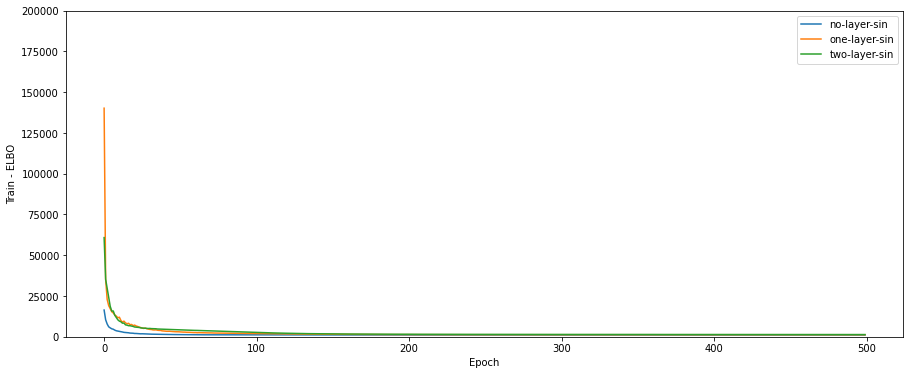

In [20]:
compare_elbo(stats, names)

In [21]:
### RMSE

In [22]:
def compare_models(stats, names, metric, xlabel="", ylabel="", fig_size=(10, 8)):
    rmse = [stats[k][metric] for k in names]

    sns.set_style("darkgrid")
    sns.set_context("paper")

    fig, ax = plt.subplots(figsize=fig_size)
    sns.lineplot(
    x=names, y=rmse, ax=ax)
    sns.scatterplot(
    x=names, y=rmse, marker="s", s=100,
    ax=ax)

    ax.set_ylabel(xlabel)
    ax.set_xlabel(ylabel)
    
    plt.show()
    
        

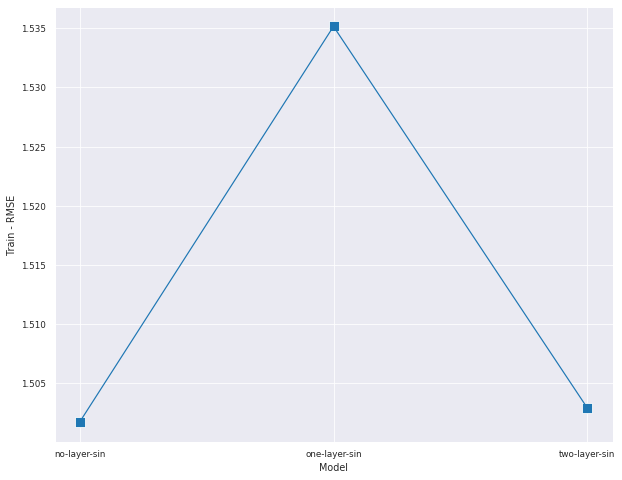

In [24]:
compare_models(stats, names, "train_rmse", xlabel="Train - RMSE", ylabel="Model")

In [25]:
### Train Time

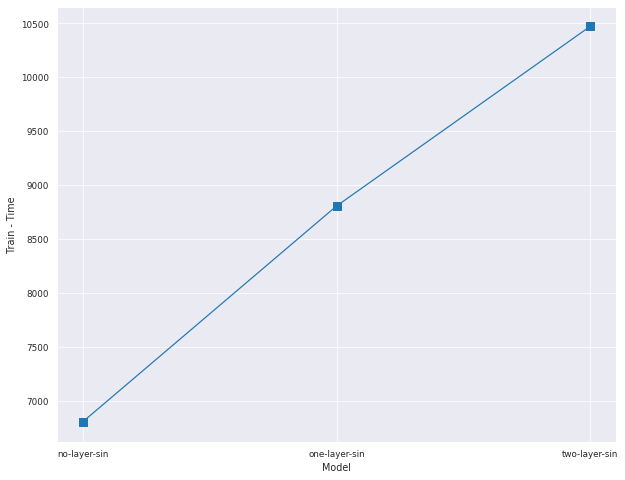

In [26]:
compare_models(stats, names, "time", xlabel="Train - Time", ylabel="Model")

In [27]:
### Results - Test

In [28]:
keys = list(res.keys())
print(keys)
print(res[keys[0]].keys())
print(res[keys[0]]["test_error"].keys())
print(res[keys[0]]["predictive"].keys())

['five-layer-sin', 'one-layer-sin', 'no-layer-sin']
dict_keys(['test_error', 'in_domain_error', 'out_domain_error', 'predictive', 'predictive_in_domain', 'predictive_out_domain'])
dict_keys(['rmse', 'mae'])
dict_keys(['kl_div', 'standardized_mean_diff', 'mean_diff', 'std_diff'])


In [29]:
def compare_model_error(res, names, domain, fig_size=(20, 8)):
    results = [res[k][domain] for k in names]
    rmse = [r["rmse"] for r in results]
    mae = [r["mae"] for r in results]

    sns.set_style("darkgrid")
    sns.set_context("paper")

    fig, ax = plt.subplots(1, 2, figsize=fig_size)
    sns.lineplot(
    x=names, y=rmse, ax=ax[0])
    sns.scatterplot(
    x=names, y=rmse, marker="s", s=100,
    ax=ax[0])
    ax[0].set_ylabel(f"{domain} - RMSE")
    ax[0].set_xlabel("Model")

    sns.lineplot(
    x=names, y=mae, ax=ax[1])
    sns.scatterplot(
    x=names, y=mae, marker="s", s=100,
    ax=ax[1])
    ax[1].set_ylabel(f"{domain} - MAE")
    ax[1].set_xlabel("Model")
    
    plt.show()

def compare_model_results(res, names, domain, fig_size=(12, 12)):
    results = [res[k][domain] for k in names]
    kl_div = [r["kl_div"] for r in results]
    standardized_mean_diff = [r["standardized_mean_diff"] for r in results]
    mean_diff = [r["mean_diff"] for r in results]
    std_diff = [r["std_diff"] for r in results]

    sns.set_style("darkgrid")
    sns.set_context("paper")

    fig, ax = plt.subplots(2, 2, figsize=fig_size)
    sns.lineplot(
    x=names, y=kl_div, ax=ax[0, 0])
    sns.scatterplot(
    x=names, y=kl_div, marker="s", s=100,
    ax=ax[0, 0])
    ax[0, 0].set_ylabel(f"{domain} - KL Divergence")
    ax[0, 0].set_xlabel("Model")

    sns.lineplot(
    x=names, y=standardized_mean_diff, ax=ax[0, 1])
    sns.scatterplot(
    x=names, y=standardized_mean_diff, marker="s", s=100,
    ax=ax[0, 1])
    ax[0, 1].set_ylabel(f"{domain} - Standardized Mean Diff")
    ax[0, 1].set_xlabel("Model")

    sns.lineplot(
    x=names, y=mean_diff, ax=ax[1, 0])
    sns.scatterplot(
    x=names, y=mean_diff, marker="s", s=100,
    ax=ax[1, 0])
    ax[1, 0].set_ylabel(f"{domain} - Mean Diff")
    ax[1, 0].set_xlabel("Model")

    sns.lineplot(
    x=names, y=std_diff, ax=ax[1, 1])
    sns.scatterplot(
    x=names, y=std_diff, marker="s", s=100,
    ax=ax[1, 1])
    ax[1, 1].set_ylabel(f"{domain} - Std Diff")
    ax[1, 1].set_xlabel("Model")
    
    plt.show()

In [30]:
### Likeness of predictive distribution

In [31]:
compare_model_results(res, names, "predictive", fig_size=(20, 15))

KeyError: 'two-layer-sin'

In [ ]:
### Test Error

In [32]:
compare_model_error(res, names, "test_error")

KeyError: 'two-layer-sin'

In [ ]:
### Results - In Domain

In [33]:
compare_model_results(res, names, "predictive_in_domain", fig_size=(20, 15))

KeyError: 'two-layer-sin'

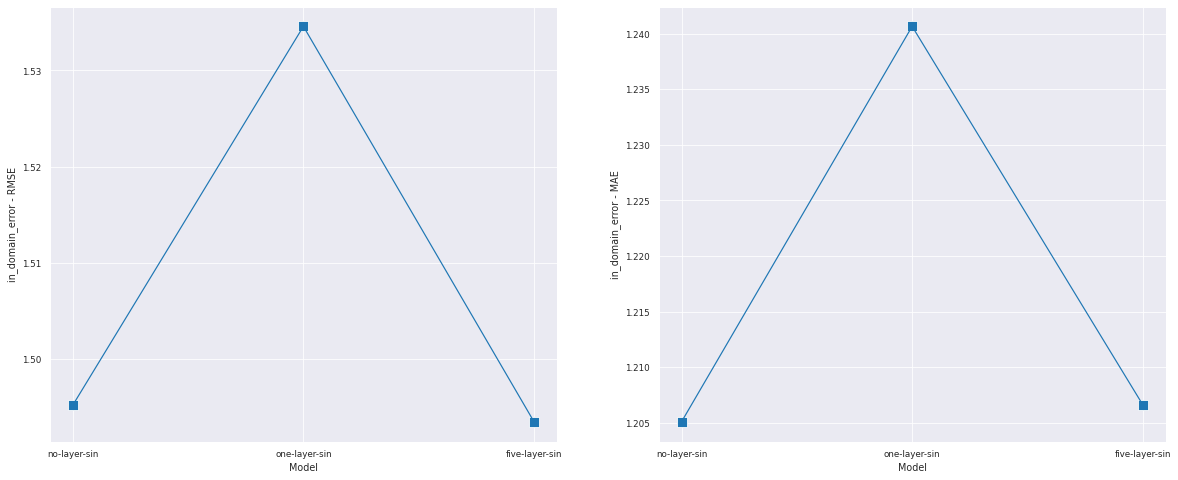

In [23]:
compare_model_error(res, names, "in_domain_error")

In [ ]:
### Out Domain

In [34]:
compare_model_results(res, names, "predictive_out_domain", fig_size=(20, 15))

KeyError: 'two-layer-sin'

In [35]:
compare_model_error(res, names, "out_domain_error")

KeyError: 'two-layer-sin'